<a href="https://colab.research.google.com/github/jerry71867/LLM/blob/main/keras_CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model=Sequential()
#創建一個空白的 Sequential 模型。
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'))
"""
向模型中添加第一個卷積層。
filters=64: 該層有 64 個卷積核（或稱過濾器），用於從輸入圖像中提取特徵。
kernel_size=(5, 5): 卷積核的大小為 5x5。
input_shape=(32, 32, 3): 輸入圖像的形狀是 32x32 像素，並具有 3 個通道（彩色圖像具有 RGB 三個通道）。
activation='relu': 使用 ReLU（整流線性單元）作為激活函數。
"""
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# 向模型中添加第二個卷積層。
model.add(MaxPooling2D(pool_size=2))
#向模型中添加最大池化層，用於減少卷積層輸出的空間尺寸。
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#重複添加兩個類似的卷積層和池化層，這樣形成了深層網絡結構，以更好地提取圖像特徵。
model.add(Flatten())
#向模型中添加 Flatten 層，用於將卷積層的輸出展平成一維向量，以便鏈接到全連接層。
model.add(Dense(10, activation='softmax'))
#向模型中添加全連接層，該層有 10 個神經元，並使用 softmax 激活函數。
model.summary()
#列印出模型的摘要，其中包括每個層的參數數量和總參數數量。
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#編譯模型，指定優化器、損失函數和評估指標。

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         409728    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                   

In [ ]:
cifar10=keras.datasets.cifar10
#導入Keras中的CIFAR-10數據集。
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
#載入CIFAR-10數據集，並將數據分為訓練數據和測試數據。
train_label_original=train_label
#將訓練數據的原始標籤複製到 train_label_original。
train_label = keras.utils.to_categorical(train_label)
#將訓練數據的標籤（原本是0到9之間的數字，對應10個不同的類別）轉換成獨熱編碼（one-hot encoding）。
test_label = keras.utils.to_categorical(test_label)
#測試數據的標籤進行了獨熱編碼的轉換，以保持一致性。

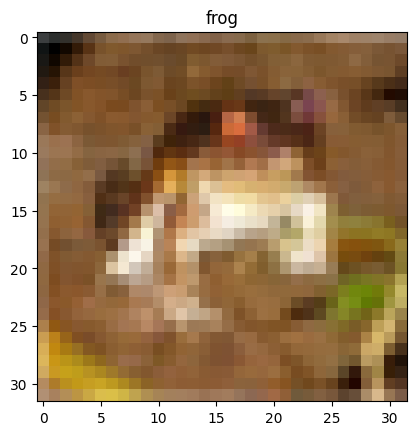

[6]


In [3]:
import matplotlib.pyplot as plt
#導入Matplotlib函式庫，用於繪製圖表和圖像。
category=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#創建了一個名為 category 的列表，其中包含CIFAR-10數據集的10個類別名稱。
plt.imshow(train_data[0])
#使用Matplotlib的 imshow 函式顯示第一張訓練圖像。
plt.title(category[int(train_label_original[0])])
#定圖表的標題，使用 category 列表中對應於 train_label_original[0] 值的類別名稱。
plt.show()
#顯示Matplotlib圖表，顯示第一張圖像以及其對應的類別名稱。
print(train_label_original[0])
#將第一張訓練圖像的原始標籤（數字形式）輸出到控制台。

In [4]:

train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
98/98 [==============================] - 596s 6s/step - loss: 12.5663 - accuracy: 0.1612
Epoch 2/10
98/98 [==============================] - 605s 6s/step - loss: 2.2622 - accuracy: 0.2187
Epoch 3/10
98/98 [==============================] - 614s 6s/step - loss: 2.1611 - accuracy: 0.2932
Epoch 4/10
98/98 [==============================] - 607s 6s/step - loss: 1.9118 - accuracy: 0.3365
Epoch 5/10
98/98 [==============================] - 605s 6s/step - loss: 1.8707 - accuracy: 0.3537
Epoch 6/10
98/98 [==============================] - 606s 6s/step - loss: 1.5589 - accuracy: 0.4607
Epoch 7/10
98/98 [==============================] - 621s 6s/step - loss: 1.4279 - accuracy: 0.5054
Epoch 8/10
98/98 [==============================] - 597s 6s/step - loss: 1.3019 - accuracy: 0.5561
Epoch 9/10
98/98 [==============================] - 592s 6s/step - loss: 1.1729 - accuracy: 0.5985
Epoch 10/10
98/98 [==============================] - 595s 6s/step - loss: 1.0783 - accuracy: 0.6319


In [5]:
score=model.evaluate(test_data, test_label)
#測試數據 test_data 和相應的標籤 test_label 來評估模型。
print(score[1])
#輸出 score 列表的第二個元素，即模型在測試數據上的準確性。


313/313 [==============================] - 33s 107ms/step - loss: 1.4141 - accuracy: 0.5525
0.5525000095367432


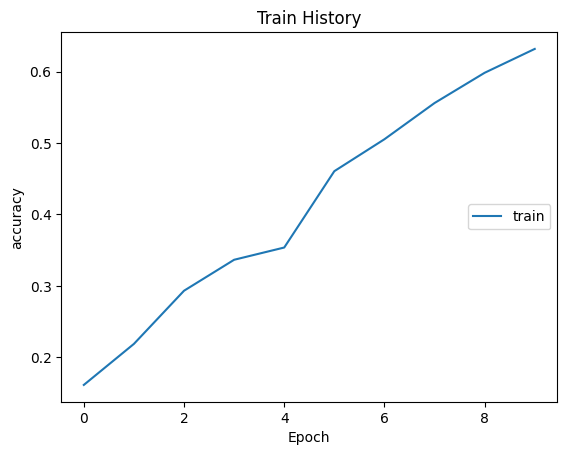

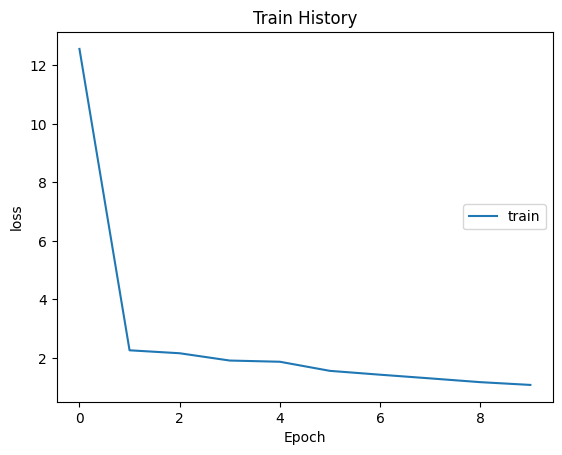

In [6]:
#繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np
#引入函式庫，包括 matplotlib 用於繪圖和 numpy 用於數值運算。
def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()
"""
自定義的函數 show_train_history
train_history: 包含訓練過程歷史信息的物件，通常是由 model.fit() 返回的訓練歷史。
train: 要繪製的訓練歷史信息，可以是 'accuracy' 或 'loss'。
"""
show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')
#呼叫 show_train_history 函數，分別繪製訓練歷史的正確性和損失圖。
